<a href="https://colab.research.google.com/github/Madhuanabala/breast-cancer/blob/feature-selection/MorganFS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data = pd.read_csv('/content/molecules_with_morganfingerprints.csv')
data

,molecule_chembl_id,FP_0,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047,bioactivity_class
0,CHEMBL266703,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1,CHEMBL2145445,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
2,CHEMBL266185,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
3,CHEMBL19195,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
4,CHEMBL83,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,CHEMBL5440580,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1813,CHEMBL5417545,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1814,CHEMBL225542,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,active
1815,CHEMBL1093100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive


In [2]:
data.dtypes


,0
molecule_chembl_id,object
FP_0,int64
FP_1,int64
FP_2,int64
FP_3,int64
...,...
FP_2044,int64
FP_2045,int64
FP_2046,int64
FP_2047,int64


In [3]:
data['bioactivity_class'].replace('active', 'P', inplace=True)
data['bioactivity_class'].replace('inactive', 'N', inplace=True)
data.rename(columns = {"bioactivity_class": "bioactivity_class"}, inplace = True)
data

<ipython-input-3-ec92a85df410>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bioactivity_class'].replace('active', 'P', inplace=True)
<ipython-input-3-ec92a85df410>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

,molecule_chembl_id,FP_0,FP_1,FP_2,FP_3,FP_4,FP_5,FP_6,FP_7,FP_8,...,FP_2039,FP_2040,FP_2041,FP_2042,FP_2043,FP_2044,FP_2045,FP_2046,FP_2047,bioactivity_class
0,CHEMBL266703,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P
1,CHEMBL2145445,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P
2,CHEMBL266185,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P
3,CHEMBL19195,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
4,CHEMBL83,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,CHEMBL5440580,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
1813,CHEMBL5417545,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
1814,CHEMBL225542,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P
1815,CHEMBL1093100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N


In [4]:
data.isnull().sum().sum()

0

In [5]:
data.dropna(inplace =True)
data.isnull().sum().sum()

0

In [6]:
data1 = data.iloc[:,1:2049]
data1
data2 = data.iloc[:,-1]

In [7]:
data1
data2

,bioactivity_class
0,P
1,P
2,P
3,N
4,P
...,...
1812,N
1813,N
1814,P
1815,N


In [8]:
from sklearn.feature_selection import VarianceThreshold
threshold = VarianceThreshold(threshold=.1)
def variance_threshold_selector(data1, threshold=0.10):
    selector = VarianceThreshold(threshold)
    selector.fit(data1)
    return data[data1.columns[selector.get_support(indices=True)]]
data1_HV = variance_threshold_selector(data1)

In [9]:
data1_HV = variance_threshold_selector(data1)
data1_HV

,FP_1,FP_80,FP_249,FP_294,FP_314,FP_322,FP_352,FP_361,FP_378,FP_389,...,FP_1745,FP_1747,FP_1750,FP_1754,FP_1855,FP_1911,FP_1917,FP_1928,FP_1970,FP_1980
0,0,1,1,1,1,1,1,1,0,1,...,0,1,1,0,0,0,1,0,1,0
1,0,1,1,1,1,1,1,1,0,1,...,0,1,1,0,0,0,1,0,1,0
2,0,1,1,1,1,1,1,1,0,1,...,0,1,1,0,0,0,1,0,1,0
3,0,1,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1813,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1814,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,1,0,0
1815,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0


In [10]:
data2_HV = pd.merge(data1_HV,data2,left_index=True,right_index=True)
data2_HV

,FP_1,FP_80,FP_249,FP_294,FP_314,FP_322,FP_352,FP_361,FP_378,FP_389,...,FP_1747,FP_1750,FP_1754,FP_1855,FP_1911,FP_1917,FP_1928,FP_1970,FP_1980,bioactivity_class
0,0,1,1,1,1,1,1,1,0,1,...,1,1,0,0,0,1,0,1,0,P
1,0,1,1,1,1,1,1,1,0,1,...,1,1,0,0,0,1,0,1,0,P
2,0,1,1,1,1,1,1,1,0,1,...,1,1,0,0,0,1,0,1,0,P
3,0,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,N
4,0,1,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,0,1,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,N
1813,0,1,0,1,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,N
1814,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,1,1,0,0,P
1815,0,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,N


In [11]:
correlated_features_1 = set()
corr_matrix_class = data2_HV.drop(columns=['bioactivity_class']).corr()


for i in range(len(corr_matrix_class.columns)):
    for j in range(i):
        if abs(corr_matrix_class.iloc[i, j]) > 0.9:
            colname = corr_matrix_class.columns[i]
            correlated_features_1.add(colname)
correlated_features_1

{'FP_1536', 'FP_1970'}

In [12]:
def remove_correlated_features(features, data):
    for x in features:
        data.drop(x, axis=1, inplace=True)
    return data


In [13]:
data3= remove_correlated_features(correlated_features_1, data2_HV)
data3

,FP_1,FP_80,FP_249,FP_294,FP_314,FP_322,FP_352,FP_361,FP_378,FP_389,...,FP_1745,FP_1747,FP_1750,FP_1754,FP_1855,FP_1911,FP_1917,FP_1928,FP_1980,bioactivity_class
0,0,1,1,1,1,1,1,1,0,1,...,0,1,1,0,0,0,1,0,0,P
1,0,1,1,1,1,1,1,1,0,1,...,0,1,1,0,0,0,1,0,0,P
2,0,1,1,1,1,1,1,1,0,1,...,0,1,1,0,0,0,1,0,0,P
3,0,1,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,N
4,0,1,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,N
1813,0,1,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,N
1814,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,1,1,0,P
1815,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,N


In [14]:
data3.to_csv('Morgan2.csv')

In [15]:
X = data3.iloc[:,1:63]  #independent columns
X
y = data3.iloc[:,-1]
y   #target column i.e price range

,bioactivity_class
0,P
1,P
2,P
3,N
4,P
...,...
1812,N
1813,N
1814,P
1815,N


In [16]:
X

,FP_80,FP_249,FP_294,FP_314,FP_322,FP_352,FP_361,FP_378,FP_389,FP_392,...,FP_1738,FP_1745,FP_1747,FP_1750,FP_1754,FP_1855,FP_1911,FP_1917,FP_1928,FP_1980
0,1,1,1,1,1,1,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
1,1,1,1,1,1,1,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
2,1,1,1,1,1,1,1,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,1,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,1,0,1,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1813,1,0,1,1,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
1814,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,1,0
1815,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0


In [17]:
from sklearn.preprocessing import StandardScaler
# y = data['class']
# X_features =data.drop(columns='class')
scaler = StandardScaler()
X_transform = scaler.fit_transform(X)
X_transform_pd = pd.DataFrame(X_transform, columns = X.columns)
X_transform_pd

# #Standardize/normalize the data
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# X_transform = sc.fit_transform(X)
# X_transform

,FP_80,FP_249,FP_294,FP_314,FP_322,FP_352,FP_361,FP_378,FP_389,FP_392,...,FP_1738,FP_1745,FP_1747,FP_1750,FP_1754,FP_1855,FP_1911,FP_1917,FP_1928,FP_1980
0,0.985249,2.018767,1.947869,0.867277,2.080492,1.521740,2.162897,-0.740959,1.787821,-0.370198,...,-0.435792,-0.371158,2.452640,0.45971,-0.368273,-0.671772,-0.433107,1.056054,-0.409558,-0.418678
1,0.985249,2.018767,1.947869,0.867277,2.080492,1.521740,2.162897,-0.740959,1.787821,-0.370198,...,-0.435792,-0.371158,2.452640,0.45971,-0.368273,-0.671772,-0.433107,1.056054,-0.409558,-0.418678
2,0.985249,2.018767,1.947869,0.867277,2.080492,1.521740,2.162897,-0.740959,1.787821,-0.370198,...,-0.435792,-0.371158,2.452640,0.45971,-0.368273,-0.671772,-0.433107,1.056054,-0.409558,-0.418678
3,0.985249,-0.495352,1.947869,-1.153034,2.080492,-0.657142,-0.462343,-0.740959,1.787821,-0.370198,...,-0.435792,-0.371158,-0.407724,0.45971,-0.368273,-0.671772,-0.433107,-0.946921,-0.409558,-0.418678
4,0.985249,-0.495352,1.947869,-1.153034,2.080492,-0.657142,-0.462343,-0.740959,1.787821,-0.370198,...,-0.435792,-0.371158,-0.407724,0.45971,-0.368273,-0.671772,-0.433107,-0.946921,-0.409558,-0.418678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,0.985249,-0.495352,1.947869,0.867277,-0.480656,1.521740,-0.462343,-0.740959,-0.559340,-0.370198,...,2.294671,-0.371158,-0.407724,0.45971,-0.368273,-0.671772,-0.433107,-0.946921,-0.409558,2.388472
1813,0.985249,-0.495352,1.947869,0.867277,-0.480656,1.521740,-0.462343,-0.740959,-0.559340,-0.370198,...,2.294671,-0.371158,-0.407724,0.45971,-0.368273,-0.671772,-0.433107,-0.946921,-0.409558,2.388472
1814,-1.014972,-0.495352,-0.513381,-1.153034,-0.480656,-0.657142,-0.462343,1.349603,-0.559340,-0.370198,...,-0.435792,-0.371158,-0.407724,0.45971,-0.368273,1.488600,-0.433107,1.056054,2.441656,-0.418678
1815,-1.014972,-0.495352,-0.513381,-1.153034,-0.480656,-0.657142,-0.462343,1.349603,-0.559340,-0.370198,...,-0.435792,2.694270,-0.407724,0.45971,-0.368273,1.488600,-0.433107,-0.946921,-0.409558,-0.418678


In [18]:

## Split data into train and test sets.
from sklearn.model_selection import train_test_split
seed_num = 10
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=seed_num)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1271, 62)
(1271,)
(546, 62)
(546,)


In [19]:

X_train

,FP_80,FP_249,FP_294,FP_314,FP_322,FP_352,FP_361,FP_378,FP_389,FP_392,...,FP_1738,FP_1745,FP_1747,FP_1750,FP_1754,FP_1855,FP_1911,FP_1917,FP_1928,FP_1980
984,1,1,0,1,0,1,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
961,1,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,1,1
1302,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1124,0,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,1,0,1,0,0
114,1,0,0,1,0,0,0,0,1,1,...,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1,1,0,1,0,1,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0
1344,1,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
527,1,0,1,1,1,0,1,1,1,1,...,0,0,0,1,0,1,1,0,0,1
1149,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0


In [20]:
y_train

,bioactivity_class
984,P
961,N
1302,P
1124,N
114,P
...,...
1393,P
1344,N
527,P
1149,P


In [21]:
Training_set  = pd.concat([X_train,y_train],axis=1)
Training_set

,FP_80,FP_249,FP_294,FP_314,FP_322,FP_352,FP_361,FP_378,FP_389,FP_392,...,FP_1745,FP_1747,FP_1750,FP_1754,FP_1855,FP_1911,FP_1917,FP_1928,FP_1980,bioactivity_class
984,1,1,0,1,0,1,1,0,0,0,...,0,1,1,0,0,0,1,0,0,P
961,1,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,1,1,1,N
1302,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,P
1124,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,N
114,1,0,0,1,0,0,0,0,1,1,...,0,0,1,1,0,0,1,0,0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1,1,0,1,0,1,1,0,0,0,...,0,1,1,0,0,0,1,0,0,P
1344,1,0,1,1,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,0,N
527,1,0,1,1,1,0,1,1,1,1,...,0,0,1,0,1,1,0,0,1,P
1149,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,P


In [22]:
Training_set.to_csv('MorganTraining_set.csv')

In [23]:
Testing_set  = pd.concat([X_test,y_test],axis=1)
Testing_set

,FP_80,FP_249,FP_294,FP_314,FP_322,FP_352,FP_361,FP_378,FP_389,FP_392,...,FP_1745,FP_1747,FP_1750,FP_1754,FP_1855,FP_1911,FP_1917,FP_1928,FP_1980,bioactivity_class
1623,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,1,1,0,P
435,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,P
1196,1,0,0,1,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,N
1610,1,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,N
1014,0,0,0,0,1,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,P
805,1,0,1,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,P
1396,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,N
194,1,1,0,0,1,0,0,0,1,0,...,0,0,1,1,0,0,1,0,0,P


In [24]:
Testing_set.to_csv('MorganTesting_set.csv')

In [25]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
kBest = SelectKBest(mutual_info_classif, k = 15)
X_kBestFeatures = kBest.fit_transform(X_train, y_train)
X_kBestFeatures.shape

(1271, 15)

In [26]:
kBest.get_support(True)

array([ 1,  5,  9, 10, 14, 17, 20, 22, 25, 28, 33, 45, 51, 52, 56])

In [27]:
X_kBestFeatures = Training_set.iloc[:, kBest.get_support(True)]
X_kBestFeatures.columns

Index(['FP_249', 'FP_352', 'FP_392', 'FP_486', 'FP_695', 'FP_781', 'FP_875',
       'FP_926', 'FP_1017', 'FP_1057', 'FP_1126', 'FP_1357', 'FP_1722',
       'FP_1738', 'FP_1754'],
      dtype='object')

In [28]:
f = kBest.get_support(1)
X_new = X_train[X_train.columns[f]]
X_new
data_scores = pd.DataFrame(kBest.scores_)
data_columns = pd.DataFrame(X.columns)

In [29]:
#Concat two dataframes for better visualization
featureScores = pd.concat([data_columns, data_scores], axis = 1)

#naming the dataframe columns
featureScores.columns = ['Features', 'Scores']
featureScores

,Features,Scores
0,FP_80,0.000000
1,FP_249,0.021047
2,FP_294,0.000497
3,FP_314,0.000000
4,FP_322,0.000000
...,...,...
57,FP_1855,0.003376
58,FP_1911,0.000000
59,FP_1917,0.009825
60,FP_1928,0.000000


In [30]:
#Print top 15 best features
print(featureScores.nlargest(15, 'Scores'))


   Features    Scores
17   FP_781  0.042618
14   FP_695  0.026444
10   FP_486  0.025875
33  FP_1126  0.024500
9    FP_392  0.023615
45  FP_1357  0.023359
22   FP_926  0.023078
56  FP_1754  0.021455
1    FP_249  0.021047
52  FP_1738  0.019729
20   FP_875  0.017330
25  FP_1017  0.016791
5    FP_352  0.016703
28  FP_1057  0.016629
51  FP_1722  0.015893


In [31]:
Graph = (featureScores.nlargest(15, 'Scores'))
Graph

,Features,Scores
17,FP_781,0.042618
14,FP_695,0.026444
10,FP_486,0.025875
33,FP_1126,0.024500
9,FP_392,0.023615
45,FP_1357,0.023359
22,FP_926,0.023078
56,FP_1754,0.021455
1,FP_249,0.021047
52,FP_1738,0.019729


In [32]:
Graph.to_csv('MorganFeatures.csv')

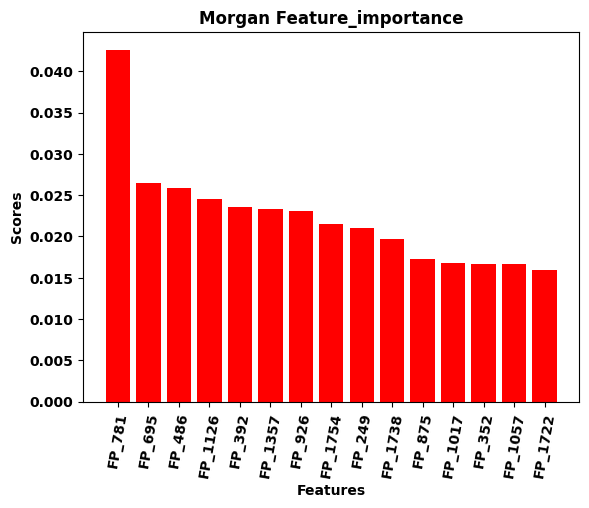

<Figure size 1000x1000 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt
data = pd.read_csv('MorganFeatures.csv')
df = pd.DataFrame(data)
X = list(df.iloc[:, 1])
Y = list(df.iloc[:, 2])
plt.bar(X, Y, color='r')
plt.title("Morgan Feature_importance", fontweight="bold")
plt.xlabel("Features", fontweight = 'bold')
plt.ylabel("Scores", fontweight = 'bold')
plt.xticks(rotation = 80, fontweight="bold")
plt.yticks(fontweight="bold")
fig = plt.figure(figsize=(10, 10))
plt.savefig("Features.jpg", bbox_inches = 'tight')

In [34]:
Trainset = pd.concat([X_new,y_train],axis=1)
Trainset

,FP_249,FP_352,FP_392,FP_486,FP_695,FP_781,FP_875,FP_926,FP_1017,FP_1057,FP_1126,FP_1357,FP_1722,FP_1738,FP_1754,bioactivity_class
984,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,P
961,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,N
1302,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,P
1124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,N
114,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,P
1344,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,N
527,0,0,1,1,1,0,1,1,0,1,0,1,1,0,0,P
1149,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,P


In [35]:
f = kBest.get_support(1)
Test_new = X_test[X_test.columns[f]]
Test_new

,FP_249,FP_352,FP_392,FP_486,FP_695,FP_781,FP_875,FP_926,FP_1017,FP_1057,FP_1126,FP_1357,FP_1722,FP_1738,FP_1754
1623,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0
435,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
1196,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1
1610,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0
1014,0,0,0,0,1,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
805,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0
1396,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0
194,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1


In [36]:
Testset = pd.concat([Test_new,y_test],axis=1)
Testset

,FP_249,FP_352,FP_392,FP_486,FP_695,FP_781,FP_875,FP_926,FP_1017,FP_1057,FP_1126,FP_1357,FP_1722,FP_1738,FP_1754,bioactivity_class
1623,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,P
435,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,P
1196,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,N
1610,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,N
1014,0,0,0,0,1,1,1,0,0,1,1,0,1,0,0,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,P
805,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,P
1396,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,N
194,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,P


In [37]:
Trainset.to_csv('MorganTrainset_after_feature.csv')
Testset.to_csv('MorganTestset_after_feature.csv')

In [38]:
Trainset['bioactivity_class'].replace('N', 0, inplace=True)
Trainset['bioactivity_class'].replace('P', 1, inplace=True)
Trainset.rename(columns = {"bioactivity_class": "bioactivity_class"}, inplace = True)
Trainset

<ipython-input-38-4a91944d22ea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Trainset['bioactivity_class'].replace('N', 0, inplace=True)
<ipython-input-38-4a91944d22ea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

,FP_249,FP_352,FP_392,FP_486,FP_695,FP_781,FP_875,FP_926,FP_1017,FP_1057,FP_1126,FP_1357,FP_1722,FP_1738,FP_1754,bioactivity_class
984,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
961,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1302,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
1124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
114,0,0,1,0,1,0,0,1,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1
1344,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
527,0,0,1,1,1,0,1,1,0,1,0,1,1,0,0,1
1149,0,0,0,0,1,1,1,1,0,1,1,1,1,1,0,1


In [39]:
Testset['bioactivity_class'].replace('N', 0, inplace=True)
Testset['bioactivity_class'].replace('P', 1, inplace=True)
Testset.rename(columns = {"bioactivity_class": "bioactivity_class"}, inplace = True)
Testset.head()

<ipython-input-39-32d0d573fec9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Testset['bioactivity_class'].replace('N', 0, inplace=True)
<ipython-input-39-32d0d573fec9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

,FP_249,FP_352,FP_392,FP_486,FP_695,FP_781,FP_875,FP_926,FP_1017,FP_1057,FP_1126,FP_1357,FP_1722,FP_1738,FP_1754,bioactivity_class
1623,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1
435,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
1196,0,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0
1610,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
1014,0,0,0,0,1,1,1,0,0,1,1,0,1,0,0,1


In [40]:
Trainset.to_csv('Morgan_Trainset1_after_feature.csv')
Testset.to_csv('Morgan_Testset1_after_feature.csv')